In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2

In [4]:
c_data = pd.read_csv("data/CarbideNetwork_Threshold.csv")
p_data = pd.read_csv("data/Pearlite_Threshold.csv")
print(c_data.head())
print(p_data.head())

           Name  Value
0  micrograph13     88
1   micrograph8     90
2  micrograph14     65
3  micrograph15     70
4  micrograph21     80
            Name  Value
0    micrograph5     90
1   micrograph59    100
2   micrograph62    109
3   micrograph91    110
4  micrograph121    150


In [36]:
data = pd.concat((c_data, p_data), axis=0).sample(frac=1)
print(len(c_data) + len(p_data) == len(data))
data.to_csv('data.csv', index=False)
print(len(data))
data.head()

True
194


,Name,Value
35,micrograph500,60
26,micrograph316,120
17,micrograph188,100
53,micrograph795,165
61,micrograph1397,138


In [37]:
def thresholding_func(img, thv):
    
    img2 = np.zeros(img.shape)
    
    for i in range(0,len(img[:,0])):
        for j in range(0,len(img[0])):
            if img[i][j] <= thv:
                img2[i][j] = 0
            elif img[i][j] > thv:
                img2[i][j] = 255
                
    return img2 

(522, 645, 3)
(522, 645)
88
(522, 645)


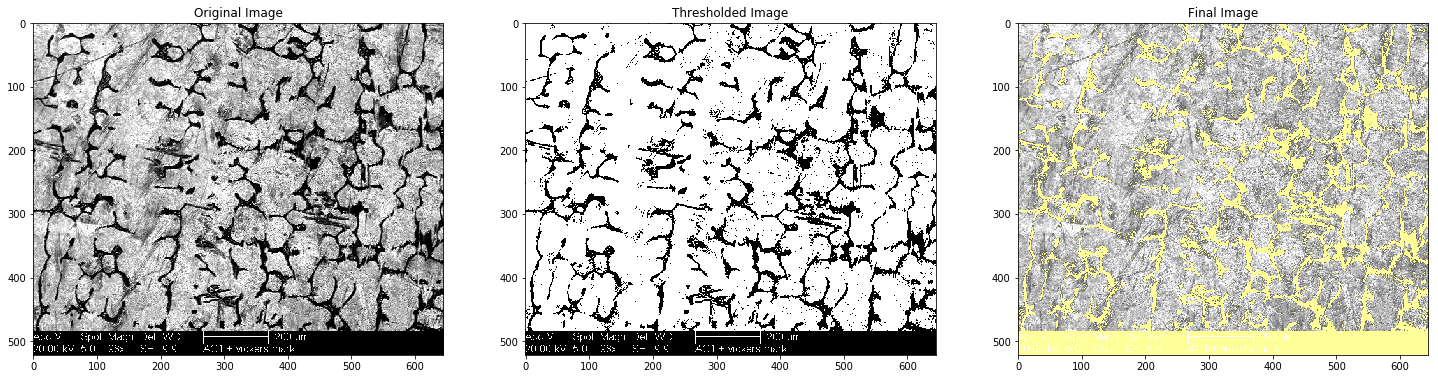

In [38]:
orig_img = cv2.imread('images/micrograph21.tif')
gray_img = cv2.imread('images/micrograph21.tif', 0)
print(orig_img.shape)
print(gray_img.shape)
pred = 88
print(pred)
#print(Y[44])
pred_img = thresholding_func(gray_img, pred)
print(pred_img.shape)
final_img = orig_img.copy()
for i in range(522):
    for j in range(645):
        if pred_img[i,j] == 0:
            final_img[i,j,:] = np.array([255,255,153])
fig=plt.figure(figsize=(25, 25))
columns = 3
rows = 1
image = [orig_img, pred_img, final_img]
title = ['Original Image', 'Thresholded Image', 'Final Image']
for i in range(1, columns*rows +1):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(title[i-1])
    plt.imshow(np.array(image[i-1],np.int32), cmap='gray')
plt.show()

(522, 645, 3)
(522, 645)
150
(522, 645)


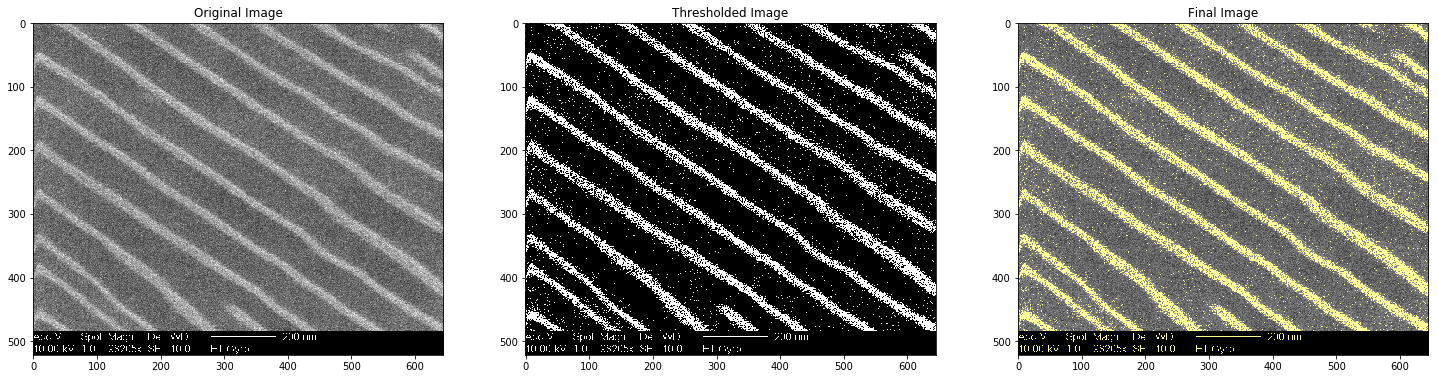

In [39]:
orig_img = cv2.imread('images/micrograph121.tif')
gray_img = cv2.imread('images/micrograph121.tif', 0)
print(orig_img.shape)
print(gray_img.shape)
pred = 150
print(pred)
#print(Y[44])
pred_img = thresholding_func(gray_img, pred)
print(pred_img.shape)
final_img = orig_img.copy()
for i in range(522):
    for j in range(645):
        if pred_img[i,j] == 255:
            final_img[i,j,:] = np.array([255,255,153])
fig=plt.figure(figsize=(25, 25))
columns = 3
rows = 1
image = [orig_img, pred_img, final_img]
title = ['Original Image', 'Thresholded Image', 'Final Image']
for i in range(1, columns*rows +1):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(title[i-1])
    plt.imshow(np.array(image[i-1],np.int32), cmap='gray')
plt.show()

In [40]:
def data_generator(thv):
    
    img_data =  np.zeros([len(thv),448,448])
    
    for i in range(len(thv)):
        name = thv['Name'][i]
        img = cv2.imread('images/' + name + '.tif',0)
        img_data[i] = img[0:448,0:448]
        
    print("Shape of 2D Data Generated: ",img_data.shape)
    
    return img_data

def data_generator3D(thv):
    
    img_data =  np.zeros([len(thv),448,448,3])
    
    for i in range(len(thv)):
        name = thv['Name'][i]
        img = cv2.imread('images/' + name + '.tif')
        img_data[i] = img[0:448,0:448,:]
        
    print("Shape of 3D Data Generated: ",img_data.shape)
    
    return img_data

In [41]:
data = pd.read_csv("data.csv")
print(data.head())
print(len(data))
tensor2d = data_generator(data)
tensor3d = data_generator3D(data)

             Name  Value
0   micrograph500     60
1   micrograph316    120
2   micrograph188    100
3   micrograph795    165
4  micrograph1397    138
194
Shape of 2D Data Generated:  (194, 448, 448)
Shape of 3D Data Generated:  (194, 448, 448, 3)


In [42]:
def size_reduction(tensor, size=(100,100)):
    
    image_data = np.zeros((len(tensor),100,100))
    
    for i in range(len(tensor)):
        image_data[i] = cv2.resize(tensor[i],size, interpolation = cv2.INTER_AREA)
    
    return image_data

In [43]:
X = size_reduction(tensor2d)
Y = np.array(data['Value']).reshape(194,1)
print(X.shape)
print(Y.shape)

(194, 100, 100)
(194, 1)


(448, 448, 3)
(448, 448)
[60]
(448, 448)


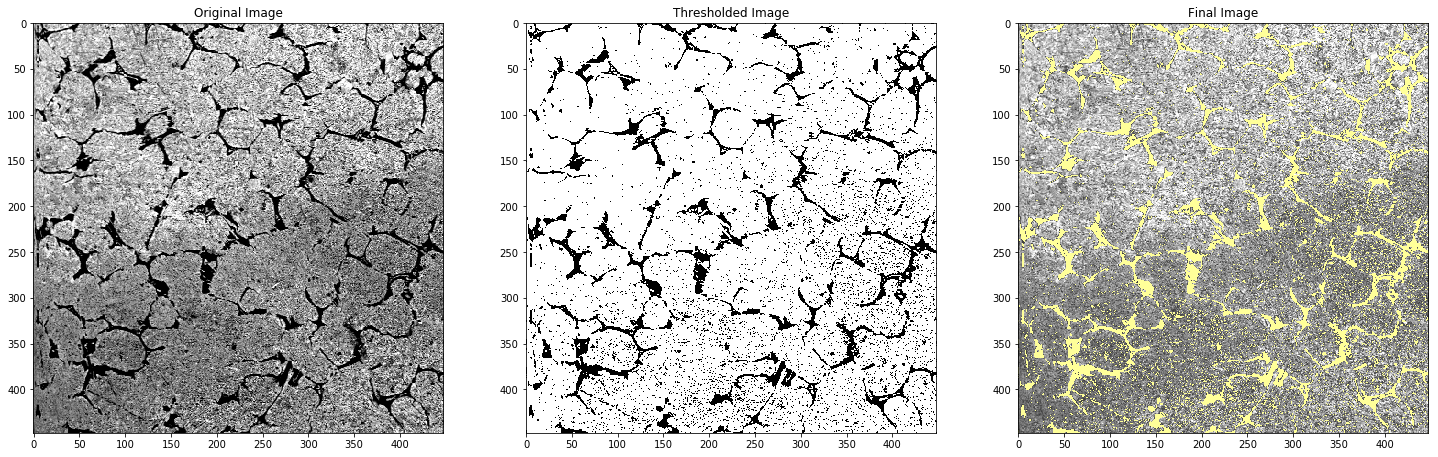

In [48]:
orig_img = tensor3d[0]
gray_img = tensor2d[0]
print(orig_img.shape)
print(gray_img.shape)
pred = Y[0]
print(pred)
#print(Y[44])
pred_img = thresholding_func(gray_img, pred)
print(pred_img.shape)
final_img = orig_img.copy()
for i in range(448):
    for j in range(448):
        if pred_img[i,j] == 0:
            final_img[i,j,:] = np.array([255,255,153])
fig=plt.figure(figsize=(25, 25))
columns = 3
rows = 1
image = [orig_img, pred_img, final_img]
title = ['Original Image', 'Thresholded Image', 'Final Image']
for i in range(1, columns*rows +1):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.title(title[i-1])
    plt.imshow(np.array(image[i-1],np.int32), cmap='gray')
plt.show()

(448, 448, 3)
(448, 448)
[140]


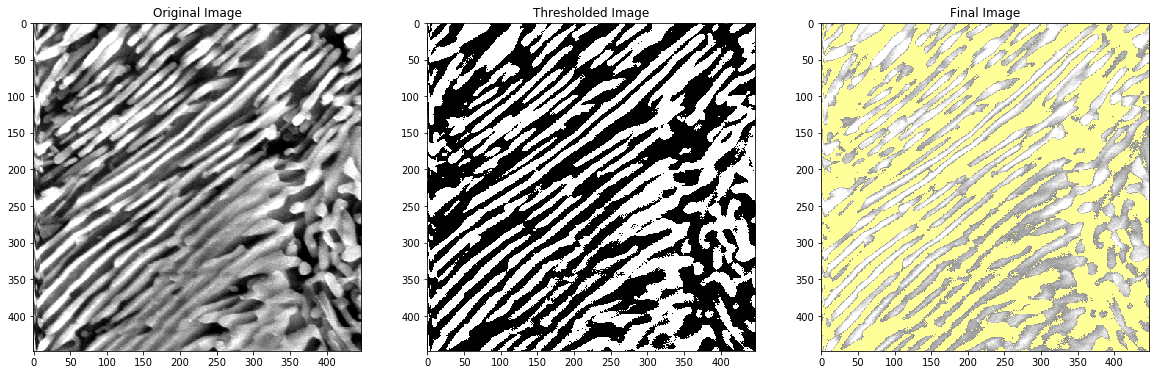

In [51]:
def color_plot(i,color=[255,255,153]):
    orig_img = tensor3d[i]
    gray_img = tensor2d[i]
    print(orig_img.shape)
    print(gray_img.shape)
    pred = Y[i]
    print(pred)
    #print(Y[i])
    pred_img = thresholding_func(gray_img, pred)
    #print(pred_img.shape)
    final_img = orig_img.copy()
    for i in range(448):
        for j in range(448):
            if pred_img[i,j] == 0:
                final_img[i,j,:] = np.array(color)
    fig=plt.figure(figsize=(20, 20))
    columns = 3
    rows = 1
    image = [orig_img, pred_img, final_img]
    title = ['Original Image', 'Thresholded Image', 'Final Image']
    for i in range(1, columns*rows +1):
        #img = np.random.randint(10, size=(h,w))
        fig.add_subplot(rows, columns, i)
        plt.title(title[i-1])
        plt.imshow(np.array(image[i-1],np.int32), cmap='gray')
    plt.show()
    
color_plot(24)